
# Exercise 9

### This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
df.isna().values.any()

False

There is no missing values in the python NaN form 

### What is the range of each quantitative predictor? Pandas' describe() function contains minimum and maximum by default. There are separate min() and max() as well. 

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.max()

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                     ?
weight                      5140
acceleration                24.8
year                          82
origin                         3
name            vw rabbit custom
dtype: object

In [7]:
df.min()

mpg                                   9
cylinders                             3
displacement                         68
horsepower                          100
weight                             1613
acceleration                          8
year                                 70
origin                                1
name            amc ambassador brougham
dtype: object

##### Some non numerical value is observed on the dataframe. Moreover some numerical entries were string. 

##### (1) If dtype is integer the missing value is NaN and fillna() works. 

##### (2) If dtype is string first convert it to float and apply the fillna() method. 

In [8]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [9]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')

In [10]:
df.isna().values.any()

True

In [11]:
df = df.fillna(df.median());

In [12]:
df.isna().values.any()

False

In [13]:
df.iloc[32]

mpg                     25
cylinders                4
displacement            98
horsepower            93.5
weight                2046
acceleration            19
year                    71
origin                   1
name            ford pinto
Name: 32, dtype: object

### What is the mean and standard deviation of each quantitative predictor?

In [14]:
df.mean()

mpg               23.515869
cylinders          5.458438
displacement     193.532746
horsepower       104.331234
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
dtype: float64

In [15]:
df.std()

mpg               7.825804
cylinders         1.701577
displacement    104.379583
horsepower       38.266994
weight          847.904119
acceleration      2.749995
year              3.690005
origin            0.802549
dtype: float64

### Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [16]:
df_1 = df.iloc[10: 86]

In [17]:
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
10,15.0,8,383.0,170.0,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii


In [18]:
df_2 = pd.concat((df.iloc[ : 10], df.iloc[85 : ]))

In [19]:
df_2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [20]:
df_2.max()

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                   230
weight                      4997
acceleration                24.8
year                          82
origin                         3
name            vw rabbit custom
dtype: object

In [21]:
df_2.mean()

mpg               24.409317
cylinders          5.378882
displacement     187.680124
horsepower       101.139752
weight          2936.807453
acceleration      15.700621
year              77.130435
origin             1.596273
dtype: float64

In [22]:
df_2.std()

mpg               7.913357
cylinders         1.657398
displacement    100.120925
horsepower       35.969168
weight          810.987533
acceleration      2.706436
year              3.131849
origin            0.815572
dtype: float64

### Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

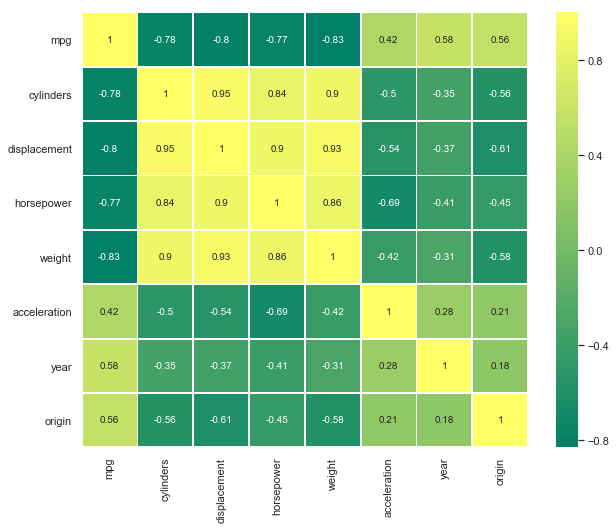

In [23]:
plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 1, cmap = 'summer')
plt.show()

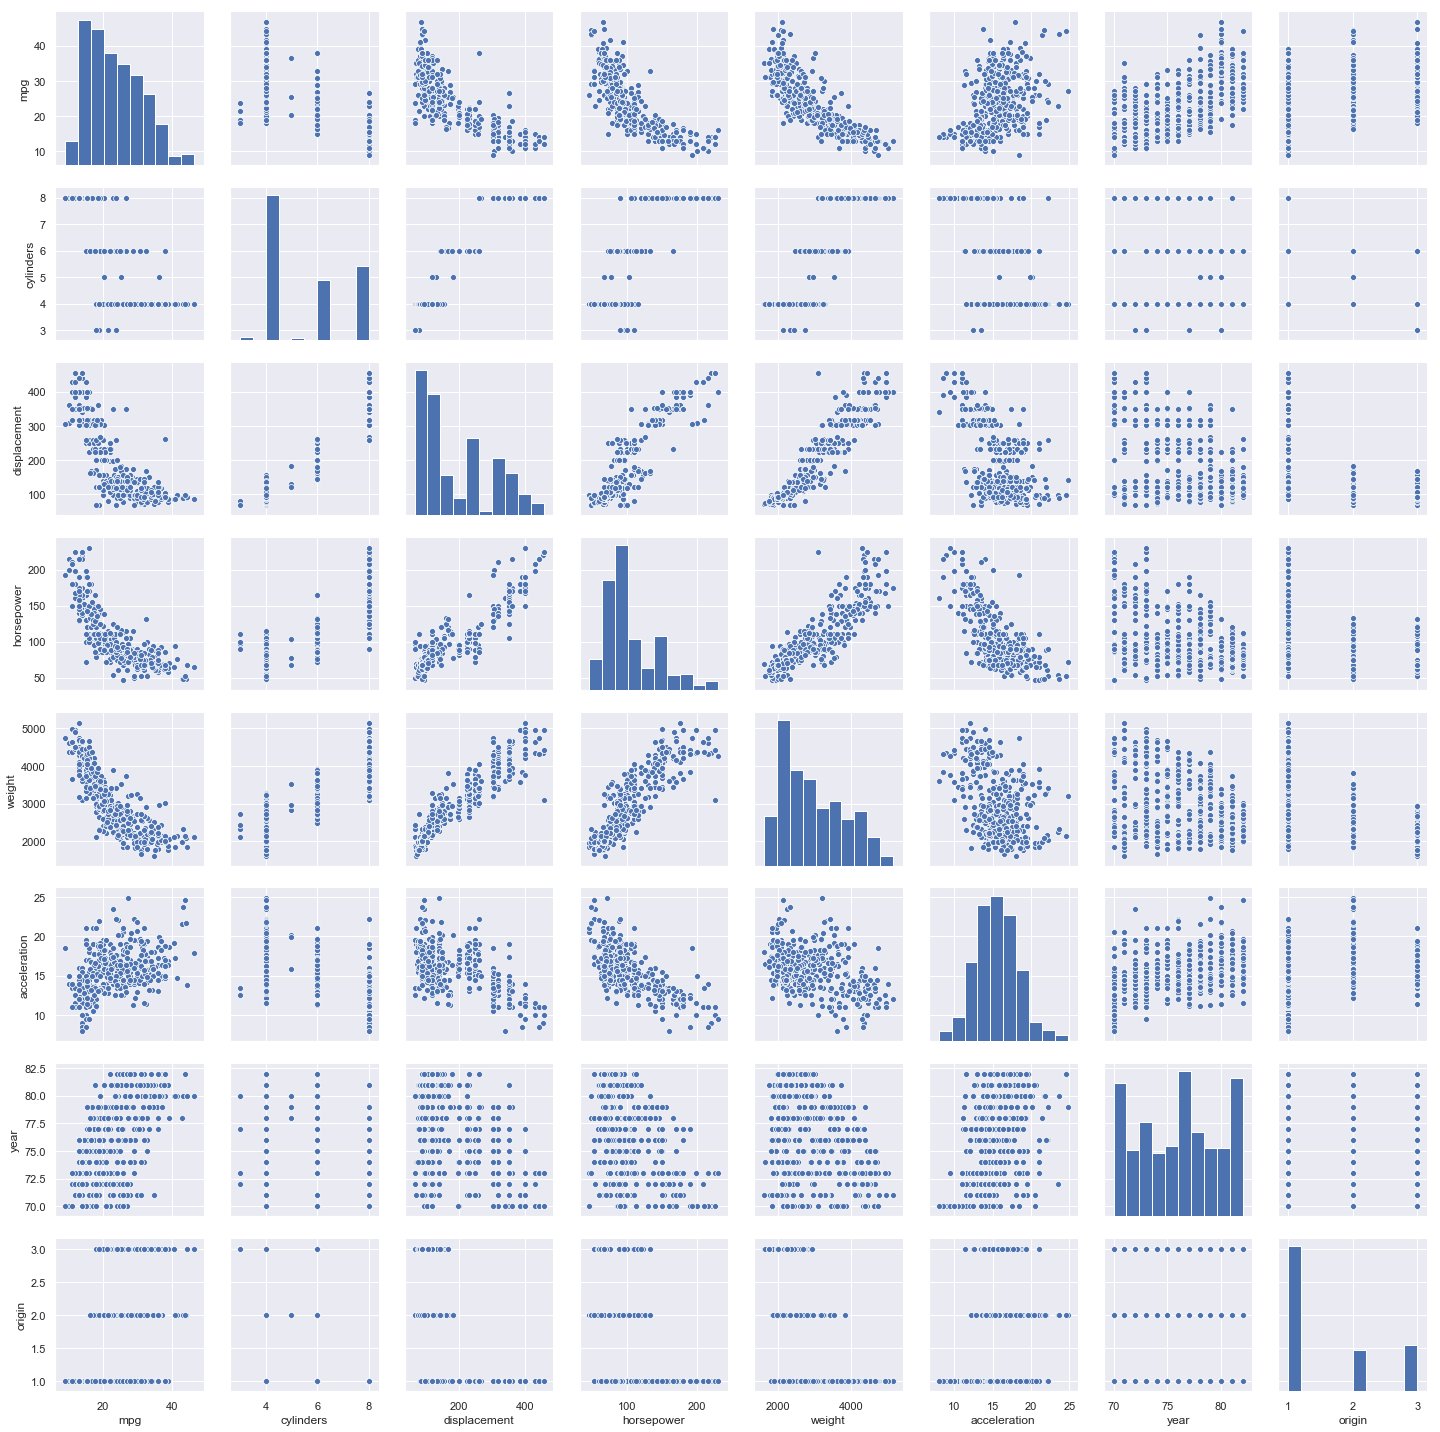

In [24]:
sns.pairplot(df)
plt.show()

### Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [25]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

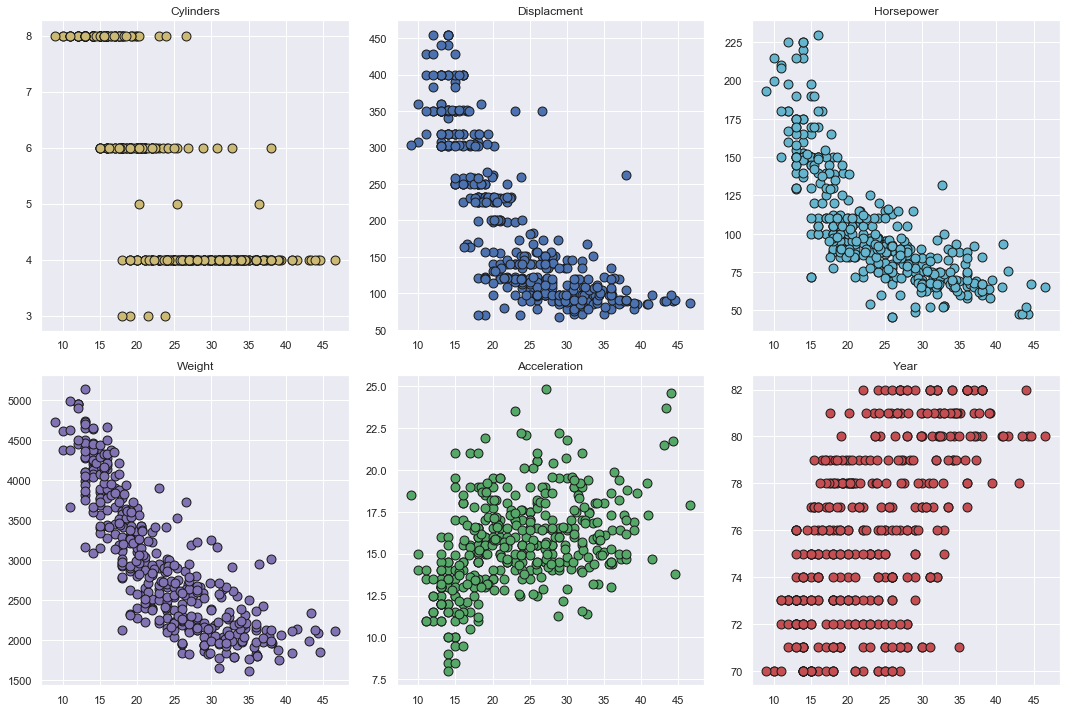

In [26]:
plt.figure(figsize= (15,10))

plt.subplot(2, 3, 1)
plt.scatter(df['mpg'],  df['cylinders'], s = 80, facecolors= 'y', edgecolors = 'k')
plt.title('Cylinders')

plt.subplot(2, 3, 2)
plt.scatter(df['mpg'],  df['displacement'], s = 80, facecolors= 'b', edgecolors = 'k')
plt.title('Displacment')

plt.subplot(2, 3, 3)
plt.scatter(df['mpg'],  df['horsepower'], s = 80, facecolors= 'c', edgecolors = 'k')
plt.title('Horsepower')

plt.subplot(2, 3, 4)
plt.scatter(df['mpg'],  df['weight'], s = 80, facecolors= 'm', edgecolors = 'k')
plt.title('Weight')

plt.subplot(2, 3, 5)
plt.scatter(df['mpg'],  df['acceleration'], s = 80, facecolors= 'g', edgecolors = 'k')
plt.title('Acceleration')

plt.subplot(2, 3, 6)
plt.scatter(df['mpg'],  df['year'], s = 80, facecolors= 'r', edgecolors = 'k')
plt.title('Year')

plt.tight_layout()
plt.show()

All the variables seem to have some correlation with the miles per gallon 